### Importing libraries

In [1]:
from keras.models import model_from_json
import numpy as np
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.mobilenet import preprocess_input

Using TensorFlow backend.


### Class names

In [2]:
class_names = [
    '20_speed',
    '30_speed',
    '50_speed',
    '60_speed',
    '70_speed',
    '80_speed',
    '80_lifted',
    '100_speed',
    '120_speed',
    'no_overtaking_general',
    'no_overtaking_trucks',
    'right_of_way_crossing',
    'right_of_way_general',
    'give_way',
    'stop',
    'no_way_general',
    'no_way_trucks',
    'no_way_one_way',
    'attention_general',
    'attention_left_turn',
    'attention_right_turn',
    'attention_curvy',
    'attention_bumpers',
    'attention_slippery',
    'attention_bottleneck',
    'attention_construction',
    'attention_traffic_light',
    'attention_pedestrian',
    'attention_children',
    'attention_bikes',
    'attention_snowflake',
    'attention_deer',
    'lifted_general',
    'turn_right',
    'turn_left',
    'turn_straight',
    'turn_straight_right',
    'turn_straight_left',
    'turn_right_down',
    'turn_left_down',
    'turn_circle',
    'lifted_no_overtaking_general',
    'lifted_no_overtaking_trucks'
]

### Loading model

In [3]:
# Model reconstruction from JSON file
with open('MobileNet_model_architecture.json', 'r') as f:
    loaded_model = model_from_json(f.read())

# Load weights into the new model
loaded_model.load_weights('MobileNet_model_weights.h5')

In [4]:
loaded_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
__________

### Loading images from test_images folder

In [5]:
# dimensions of images
img_width, img_height = 224, 224
folder_path = r"test_images"

In [13]:
# takes a shitload of time. [insert totally worth it meme here]
images = []

for root, directories, file_paths in os.walk(folder_path):
    for filename in file_paths:
        img_path = os.path.join(root, filename)
    
        image = load_img(img_path, target_size=(img_width, img_height))

        image = img_to_array(image)

        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))

        image = preprocess_input(image)

        images.append(image)
        
print(len(images))

102


### Predicting images

In [25]:
predictions = []

for image in images:
    yhat = loaded_model.predict(image)

    predictions_int = np.argmax(yhat)
    
    predictions.append(class_names[predictions_int])

In [26]:
gt = ['20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', 
      '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', 
      '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', 
      '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', 
      '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', 
      'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 
      'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 
      'attention_curvy', 'attention_curvy', 'attention_curvy', 'attention_curvy', 'attention_curvy', 'attention_curvy', 'attention_curvy', 'attention_curvy', 'attention_curvy', 
      'right_of_way_crossing', 'attention_traffic_light', 'attention_traffic_light', 'attention_traffic_light', 'attention_traffic_light', 'attention_traffic_light', 'attention_traffic_light', 'attention_traffic_light', 'attention_traffic_light', 'attention_traffic_light', 'attention_traffic_light', 
      'turn_right', 'turn_right', 'turn_right', 'turn_right', 'turn_right', 'turn_right', 'turn_right', 'turn_right', 'turn_right','turn_right']

In [39]:
predictions[1]  = '20_speed'
predictions[13] = '30_speed'
predictions[36] = '80_lifted'
print(predictions)
print(len(predictions))

['20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '20_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '30_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '70_speed', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', '80_lifted', 'turn_left_down', '80_lifted', '80_lifted', '80_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', '120_speed', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'right_of_way_general', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no_way_one_way', 'no

### Plotting images and predicted labels

In [40]:
images_cv2 = []
for root, directories, file_paths in os.walk(folder_path):
    for filename in file_paths:
        img_path = os.path.join(root, filename)
        img = cv2.imread(img_path, 1)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images_cv2.append(img)

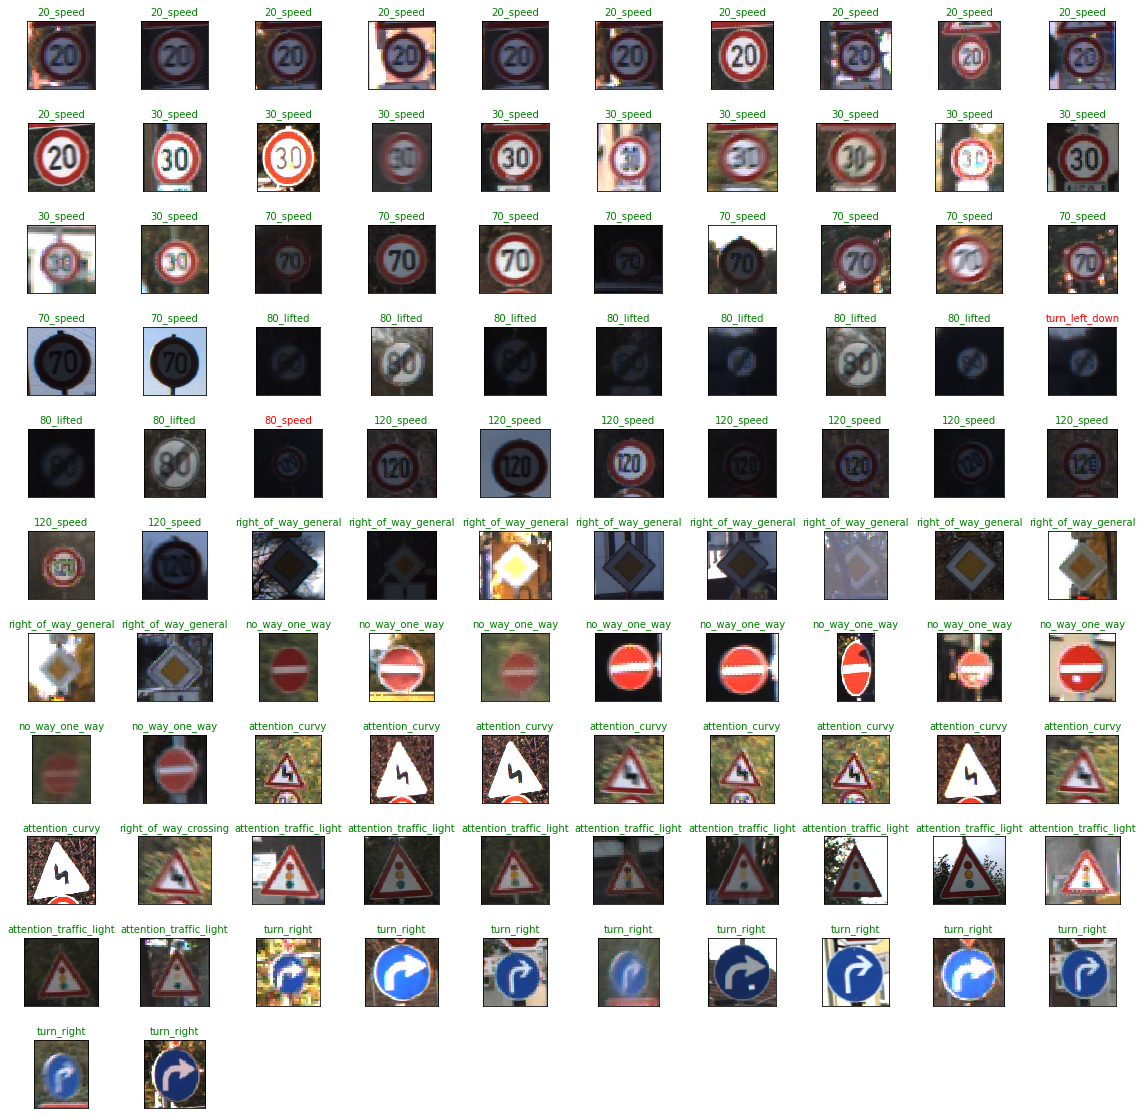

In [41]:
ROWS = 11
COLS = 10



plt.figure(figsize=(20, 20))

for i in range(len(images)):
    plt.subplot(ROWS, COLS, i+1)
    plt.imshow(images_cv2[i])
    plt.subplots_adjust(hspace=0.5)
    if predictions[i] == gt[i]:
        COLOR = 'green'
    else:
        COLOR = 'red'
    plt.title(predictions[i], fontsize=10, color=COLOR)
    plt.xticks([])
    plt.yticks([])

plt.show()